In [1]:
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from path_explain.path_explainer_tf import PathExplainerTF

In [8]:
num_samples = 1000
sqrt_samples = np.ceil(np.sqrt(num_samples)).astype(int)
spaced_points = np.linspace(start=0.0, stop=1.0, num=sqrt_samples, endpoint=True)
product = np.outer(spaced_points, spaced_points).flatten()

num_drawn = len(product)
slice_indices = np.round(np.linspace(start=0.0,
                                     stop=num_drawn-1,
                                     num=num_samples,
                                     endpoint=True)).astype(int)
product = product[slice_indices]

ones_map = np.ones(sqrt_samples)
beta = np.outer(spaced_points, ones_map).flatten()
beta = beta[slice_indices]

alpha = np.outer(ones_map, spaced_points).flatten()
alpha = alpha[slice_indices]

In [10]:
assert np.all(alpha * beta == product)

In [2]:
explainer = PathExplainerTF(None)

In [3]:
num_samples = 10000
samples = np.random.uniform(low=0.0, high=1.0, size=num_samples)
samples = np.exp(-samples)

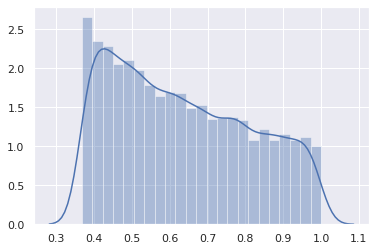

In [5]:
sns.distplot(samples)

In [6]:
sampled_alphas = np.random.uniform(low=0.0, high=1.0, size=num_samples) * np.random.uniform(low=0.0, high=1.0, size=num_samples)

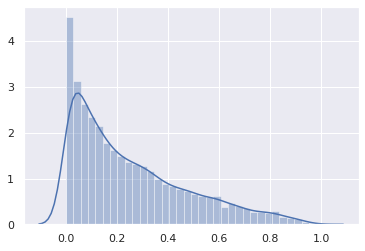

In [7]:
sns.distplot(sampled_alphas)

In [8]:
from scipy.special import lambertw

In [30]:
spaced = np.linspace(0.0, 1.0, np.ceil(np.sqrt(num_samples)).astype(int))
x = np.outer(spaced, spaced)
x = x.flatten()

In [35]:
points = np.linspace(0.0, 1.0, num_samples)

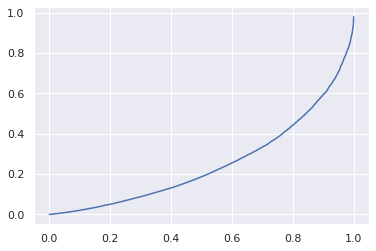

In [36]:
sns.lineplot(x=points, y=np.sort(sampled_alphas))

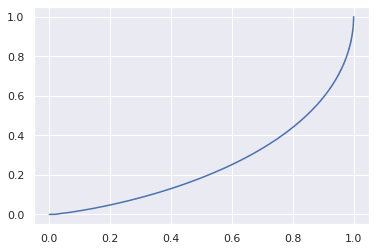

In [38]:
sns.lineplot(x=points, y=np.sort(x))

In [62]:
num_samples = 10000
sqrt_samples = np.ceil(np.sqrt(num_samples)).astype(int)
num_drawn = sqrt_samples * sqrt_samples

In [63]:
slice_indices = np.round(np.linspace(start=0.0, stop=num_drawn-1, num=num_samples, endpoint=True)).astype(int)

In [65]:
x[slice_indices].shape

(10000,)

In [3]:
product, beta = explainer._sample_alphas(99, False, True)

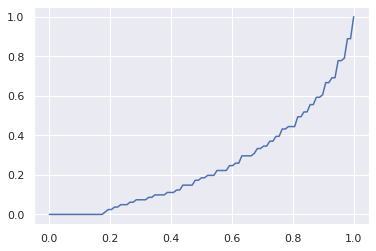

In [9]:
sns.lineplot(x=np.linspace(0.0, 1.0, 99), y=np.sort(product))